In [31]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

!ls

import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Breastcancer.csv  spark-2.3.1-bin-hadoop2.7	 spark-2.3.1-bin-hadoop2.7.tgz.1
sample_data	  spark-2.3.1-bin-hadoop2.7.tgz


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [33]:
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
df =spark.read.format("csv").option("header","true").load("Breastcancer.csv")
df.show(5)
df.printSchema()


+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|condition|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+---------+-----------+------------+---

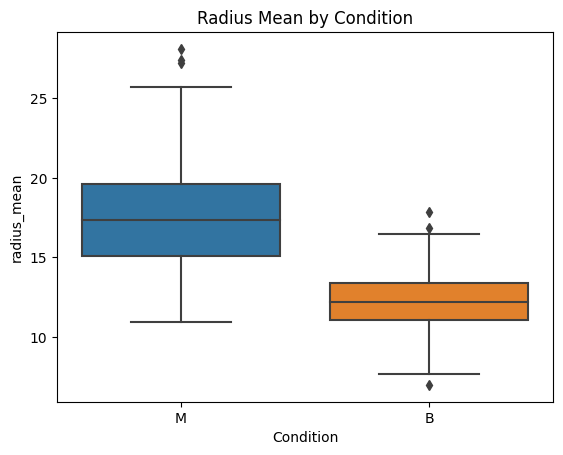

In [34]:
sns.boxplot(x="condition", y="radius_mean", data=data.toPandas())
plt.xlabel("Condition")
plt.ylabel("radius_mean")
plt.title("Radius Mean by Condition")
plt.show()


<ipython-input-35-6aad896a1128>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.toPandas().corr()


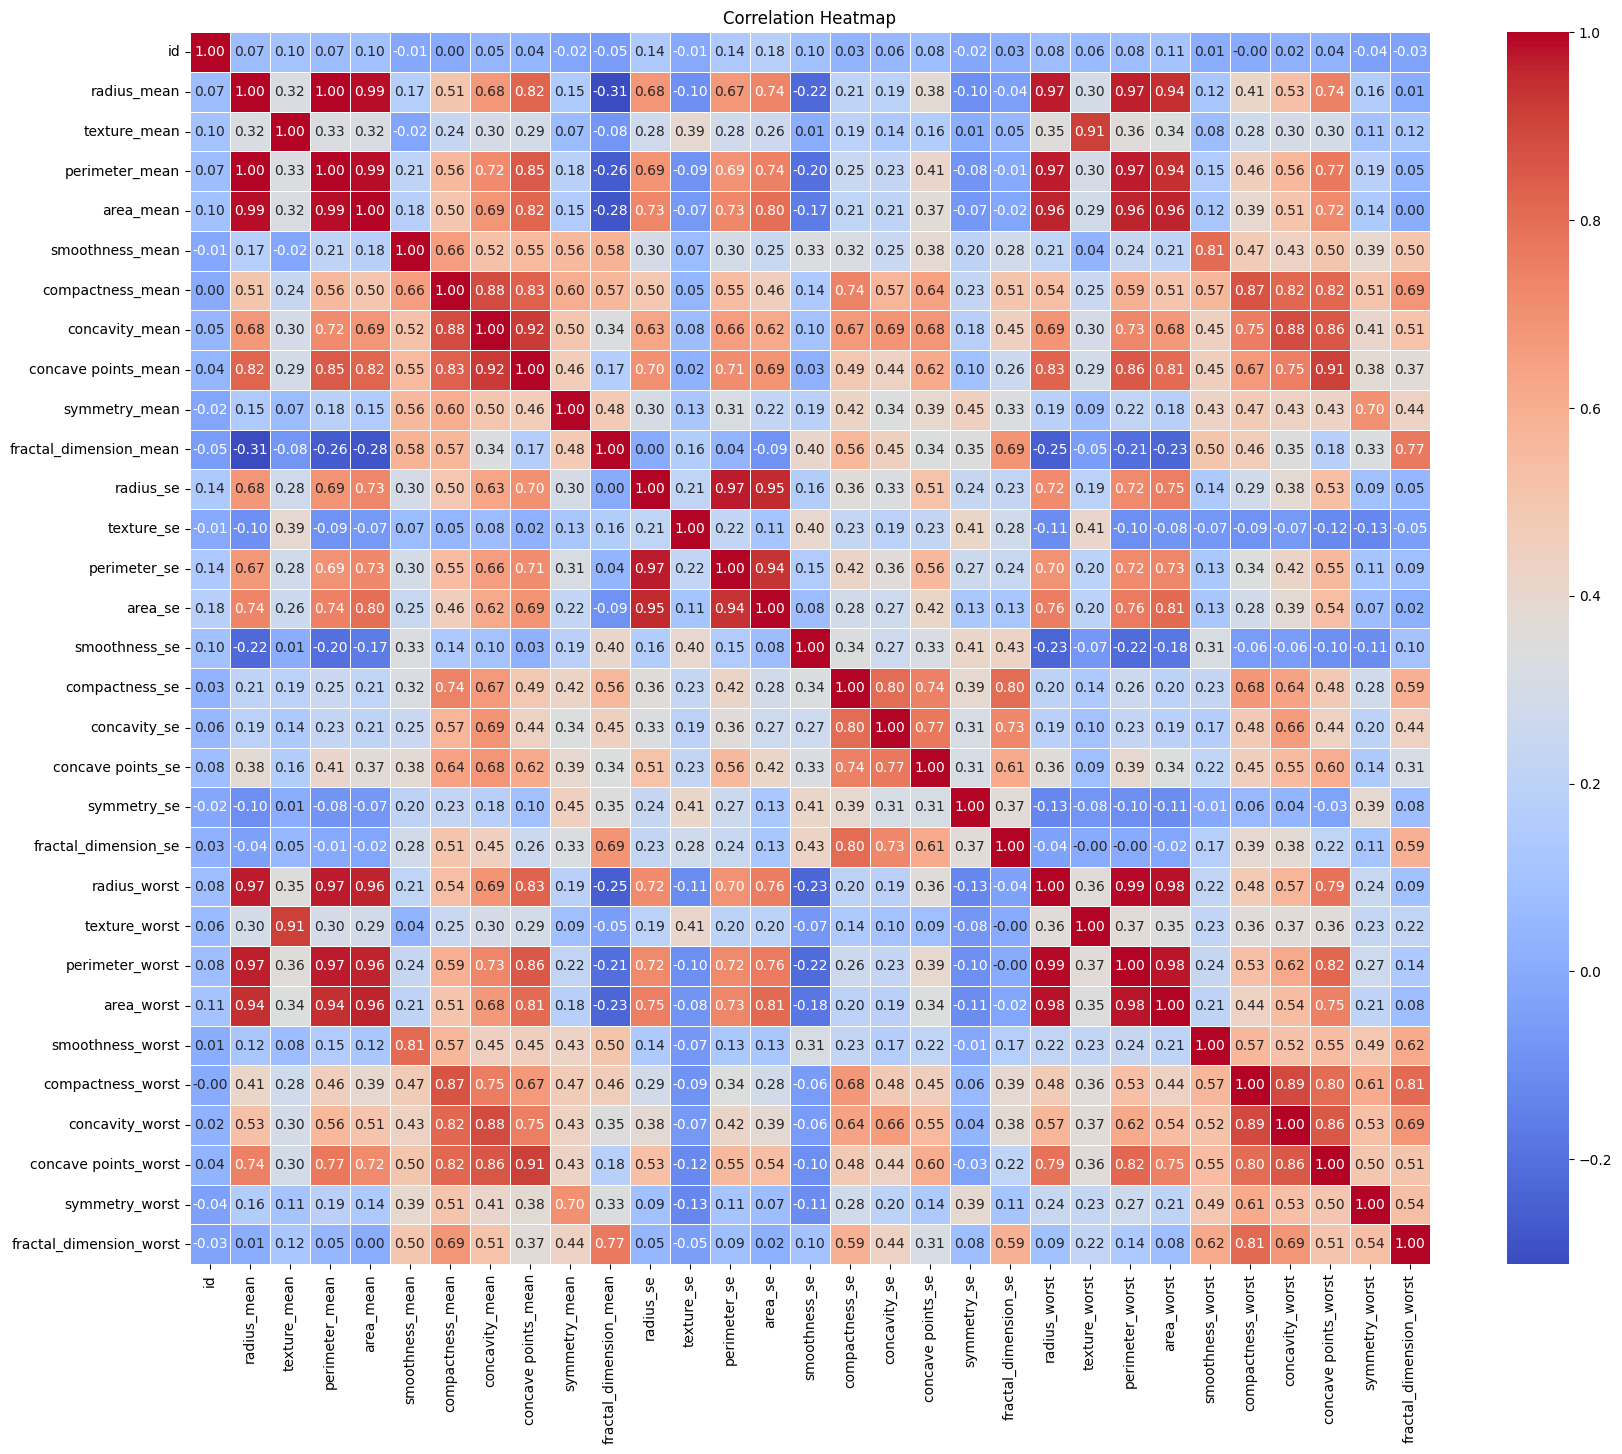

In [35]:
correlation_matrix = data.toPandas().corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [36]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler


In [37]:
data = spark.read.csv("Breastcancer.csv", header=True, inferSchema=True)

# Select relevant features for clustering (e.g., numerical columns)
selected_features = ["radius_mean", "texture_mean", "smoothness_mean", "area_mean"]
feature_assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
data = feature_assembler.transform(data)


In [38]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(data)
scaled_data = scaler_model.transform(data)


In [39]:
kmeans = KMeans().setK(3)  # Number of clusters
kmeans = kmeans.setSeed(1)  # For reproducibility
kmeans_model = kmeans.fit(scaled_data)  # Use scaled_data if you've standardized features


In [40]:
clustered_data = kmeans_model.transform(scaled_data)


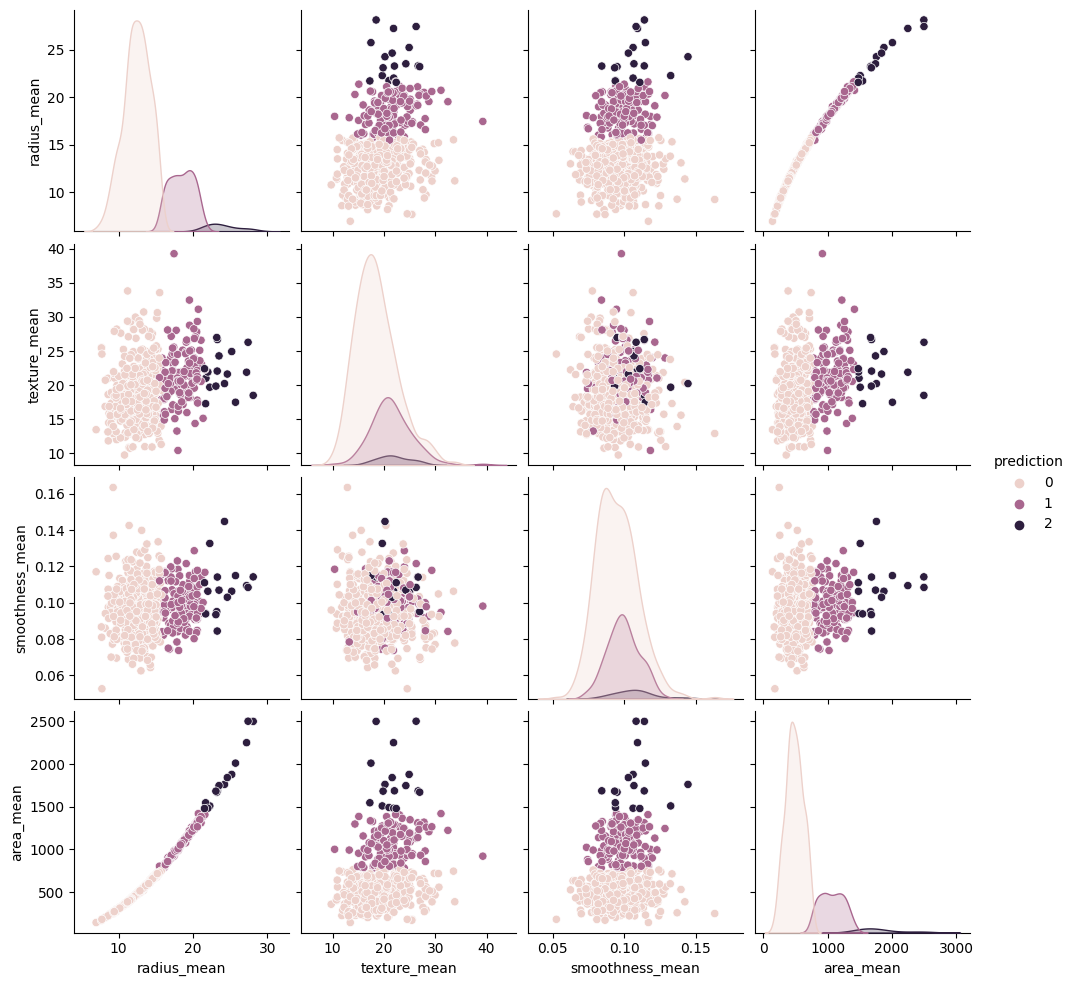

In [41]:
# Visualize the clusters (for 2D data)
import pandas as pd
clustered_df = clustered_data.select("prediction", *selected_features).toPandas()
sns.pairplot(clustered_df, hue="prediction")
plt.show()
